# Ensemble Classification

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from IPython.display import Markdown

import numpy as np
import random as rnd
import seaborn as sns

In [2]:
# from matplotlib import colormaps
# list(colormaps)

In [3]:
N_SEED = 19
TOP_K = 10

np.random.seed(N_SEED)
rnd.seed(N_SEED)
COLOR_MAP = "Spectral"

## Self-created dataset

In [4]:
X = np.array([[1.0], [2.0], [3.0], [4.0], [4.5], [5.5]])
y = np.array([0.0, 0.0, 0.0, 1.0, 1.0, 1.0])
X_test = np.array([[3], [5.1]])
y_test = np.array([[0.0], [1.0]])

### Create a model and fit data into the model

In [5]:
rfc_model = RandomForestClassifier(
    max_depth=2,
    random_state=N_SEED,
    n_jobs = 2,
).fit(X, y)

In [6]:
gbc_model = GradientBoostingClassifier(
    max_depth=2,
    random_state=N_SEED,
).fit(X, y)

In [7]:
rfc_model.score(X_test, y_test)

1.0

In [8]:
gbc_model.score(X_test, y_test)

1.0

### Predict

In [9]:
y_rfc_pred = rfc_model.predict(X_test)
y_rfc_pred

array([0., 1.])

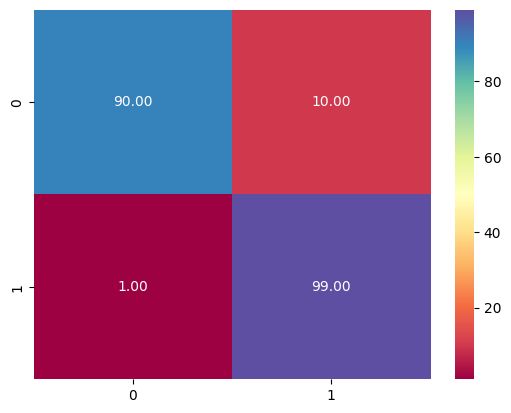

In [10]:
y_rfc_p = rfc_model.predict_proba(X_test) * 100
sns.heatmap(y_rfc_p, annot=True, cmap=COLOR_MAP, fmt=".2f");

In [11]:
y_gbc_pred = gbc_model.predict(X_test)
y_gbc_pred

array([0., 1.])

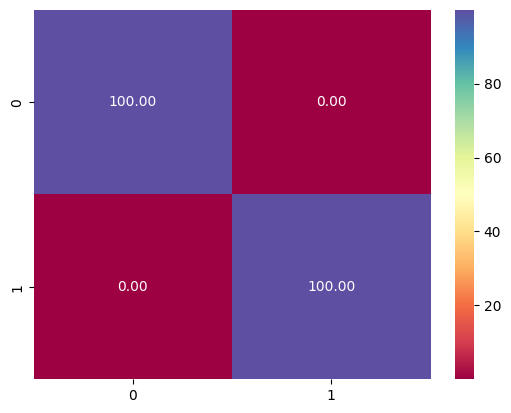

In [12]:
y_gbc_p = gbc_model.predict_proba(X_test) * 100
sns.heatmap(y_gbc_p, annot=True, cmap=COLOR_MAP, fmt=".2f");

## Iris dataset (classification problem)

In [13]:
X1, y1 = load_iris(return_X_y=True)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=N_SEED)

### Create a model and fit data into the model

In [14]:
rfc_model1 = RandomForestClassifier(
    max_depth=2,
    random_state=N_SEED,
    n_jobs = 2,
).fit(X1_train, y1_train)

In [15]:
gbc_model1 = GradientBoostingClassifier(
    max_depth=2,
    random_state=N_SEED,
).fit(X1_train, y1_train)

### Predict

In [16]:
y1_rfc_pred = rfc_model1.predict(X1_test)
y1_rfc_pred[:TOP_K]

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2])

In [17]:
y1_gbc_pred = gbc_model1.predict(X1_test)
y1_gbc_pred[:TOP_K]

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2])

In [18]:
y1_test[:TOP_K]

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2])

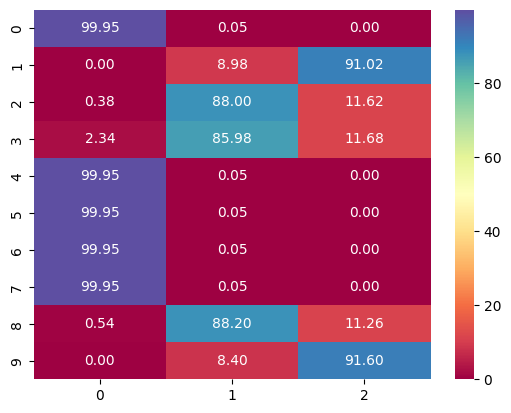

In [19]:
y1_rfc_p = rfc_model1.predict_proba(X1_test) * 100
sns.heatmap(y1_rfc_p[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".2f");

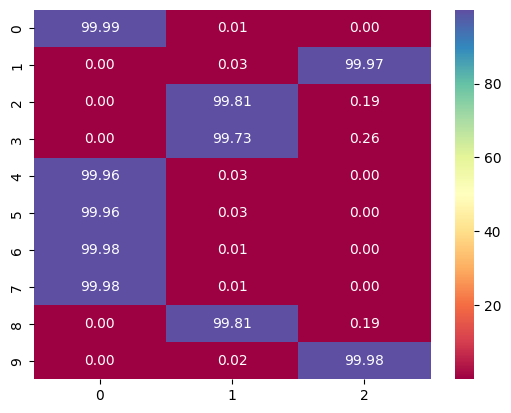

In [20]:
y1_gbc_p = gbc_model1.predict_proba(X1_test) * 100
sns.heatmap(y1_gbc_p[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".2f");

### Confusion Matrix

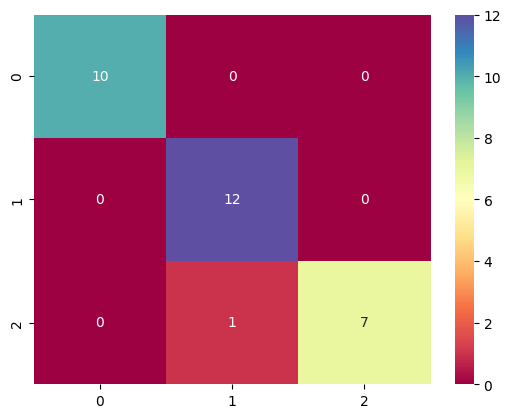

In [21]:
cm1_rfc = confusion_matrix(y_true=y1_test, y_pred=y1_rfc_pred)
sns.heatmap(cm1_rfc, annot=True, cmap=COLOR_MAP, fmt=".0f");

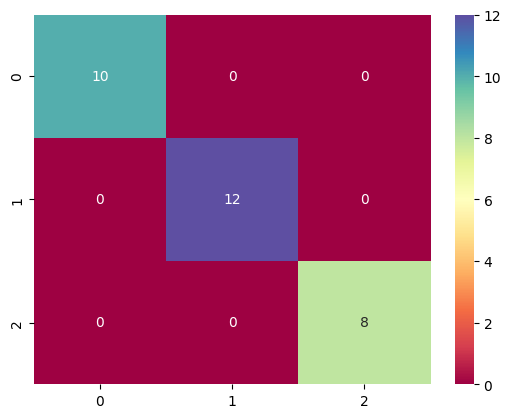

In [22]:
cm1_gbc = confusion_matrix(y_true=y1_test, y_pred=y1_gbc_pred)
sns.heatmap(cm1_gbc, annot=True, cmap=COLOR_MAP, fmt=".0f");

### Classification Report

In [23]:
Markdown(classification_report(y_true=y1_test, y_pred=y1_rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


In [24]:
Markdown(classification_report(y_true=y1_test, y_pred=y1_gbc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
